<a href="https://colab.research.google.com/github/yuuuumelody08/3D_HW/blob/main/corresponding_analysis_prince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This program is used to conduct the correspondence analysis, showing the steps by steps to immplement the data analysis and draw a 2D positioning map.
#### This is a case of different types of pottery found in different archaelogical sites.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('/ftb.xlsx', sheet_name='sheet1')
df  # sites are the locations where archaeological evidence was found.
# each evidence was labeled characteristics: A,B,C,or D. df is called a frequency table.

,site,G,LD,LN,H,LP
0,g,35,37,36,37,27
1,mi,40,46,40,43,41
2,Mode,40,41,41,50,43


In [ ]:
df=df.set_index('site') # reset the site column as the index of df
df

,G,LD,LN,H,LP
site,,,,,
g,35,37,36,37,27
mi,40,46,40,43,41
Mode,40,41,41,50,43


In [ ]:
# only extract the values from a dataframe without the column names and indices
contingency_table = df.values
row_categories=df.index   # save the site names, index (row) names of df
col_categories=df.columns # save the type names, column names of df

In [ ]:
!pip install prince
import prince


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 12.9 MB/s eta 0:00:00


In [ ]:
ca = prince.CA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
ca = ca.fit(df)

In [ ]:
# Extract row and column coordinates
row_coords = - ca.row_coordinates(df)
print(row_coords)
col_coords = - ca.column_coordinates(df)
print(col_coords)

             0         1
site                    
g    -0.076861  0.020375
mi    0.006131 -0.044741
Mode  0.055500  0.027401
           0         1
G  -0.036794  0.005127
LD -0.043445 -0.044078
LN -0.039600  0.017384
H   0.028194  0.046520
LP  0.095375 -0.028878


In [ ]:
row_pcs_df = row_coords.rename(columns={0: 'Dim 0', 1:'Dim 1'})
col_pcs_df = col_coords.rename(columns={0: 'Dim 0', 1:'Dim 1'})

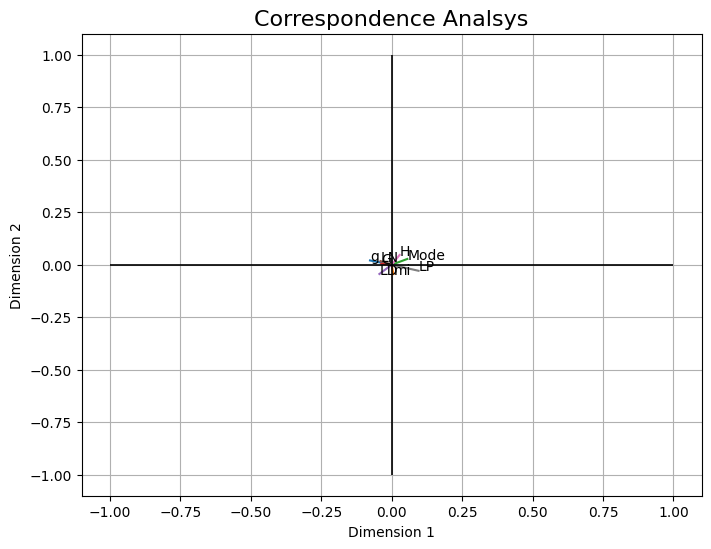

In [ ]:
# Plotting the results
plt.figure(figsize=(8,6))
for i, txt in enumerate(list(row_categories)):
    plt.plot([0,row_pcs_df.iloc[i]['Dim 0']],[0,row_pcs_df.iloc[i]['Dim 1']])   #each line starts from original (0,0)
    plt.annotate(txt, (row_pcs_df.iloc[i]['Dim 0'], row_pcs_df.iloc[i]['Dim 1']))# attach the point at the coordinate(dim0, dim1)
for i, txt in enumerate(list(col_categories)):
    plt.plot([0,col_pcs_df.iloc[i]['Dim 0']],[0,col_pcs_df.iloc[i]['Dim 1']])
    plt.annotate(txt, (col_pcs_df.iloc[i]['Dim 0'], col_pcs_df.iloc[i]['Dim 1']))
plt.title('Correspondence Analsys',fontsize=16)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.vlines(0,-1,1,linewidth=1.2, color='k') # plot the y-axis
plt.hlines(0,-1,1,linewidth=1.2, color='k' )# plot the x-axis
plt.grid()
plt.show()

In [ ]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.003,72.08%,72.08%
1,0.001,27.92%,100.00%


In [ ]:
ca.row_cosine_similarities(df).head(10)

,0,1
site,,
g,0.934344,0.065656
mi,0.018435,0.981565
Mode,0.804016,0.195984


In [ ]:
ca.column_cosine_similarities(df).head()

,0,1
G,0.980951,0.019049
LD,0.492770,0.507230
LN,0.838421,0.161579
H,0.268636,0.731364
LP,0.916019,0.083981
